In [ ]:
import pandas
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
import yfinance as yf
import pandas as pd
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2024, 9, 30)
df = yf.download("AAPL", start, end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.568928,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.561871,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.750263,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.214222,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.061150,82271200
...,...,...,...,...,...,...
2024-09-23,227.339996,229.449997,225.809998,226.470001,226.470001,54146000
2024-09-24,228.649994,229.350006,225.729996,227.369995,227.369995,43556100
2024-09-25,224.929993,227.289993,224.020004,226.369995,226.369995,42308700


In [ ]:
print(df.head())
print(df.shape)

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-01-02  42.540001  43.075001  42.314999  43.064999  40.568928  102223600
2018-01-03  43.132500  43.637501  42.990002  43.057499  40.561871  118071600
2018-01-04  43.134998  43.367500  43.020000  43.257500  40.750263   89738400
2018-01-05  43.360001  43.842499  43.262501  43.750000  41.214222   94640000
2018-01-08  43.587502  43.902500  43.482498  43.587502  41.061150   82271200
(1696, 6)


In [ ]:
df_10 = pd.DataFrame()
df_10['Close'] = df['Close'].rolling(window=10).mean()
df_20 = pd.DataFrame()
df_20['Close'] = df['Close'].rolling(window=20).mean()
df_30 = pd.DataFrame()
df_30['Close'] = df['Close'].rolling(window=30).mean()
df_40 = pd.DataFrame()
df_40['Close'] = df['Close'].rolling(window=40).mean()

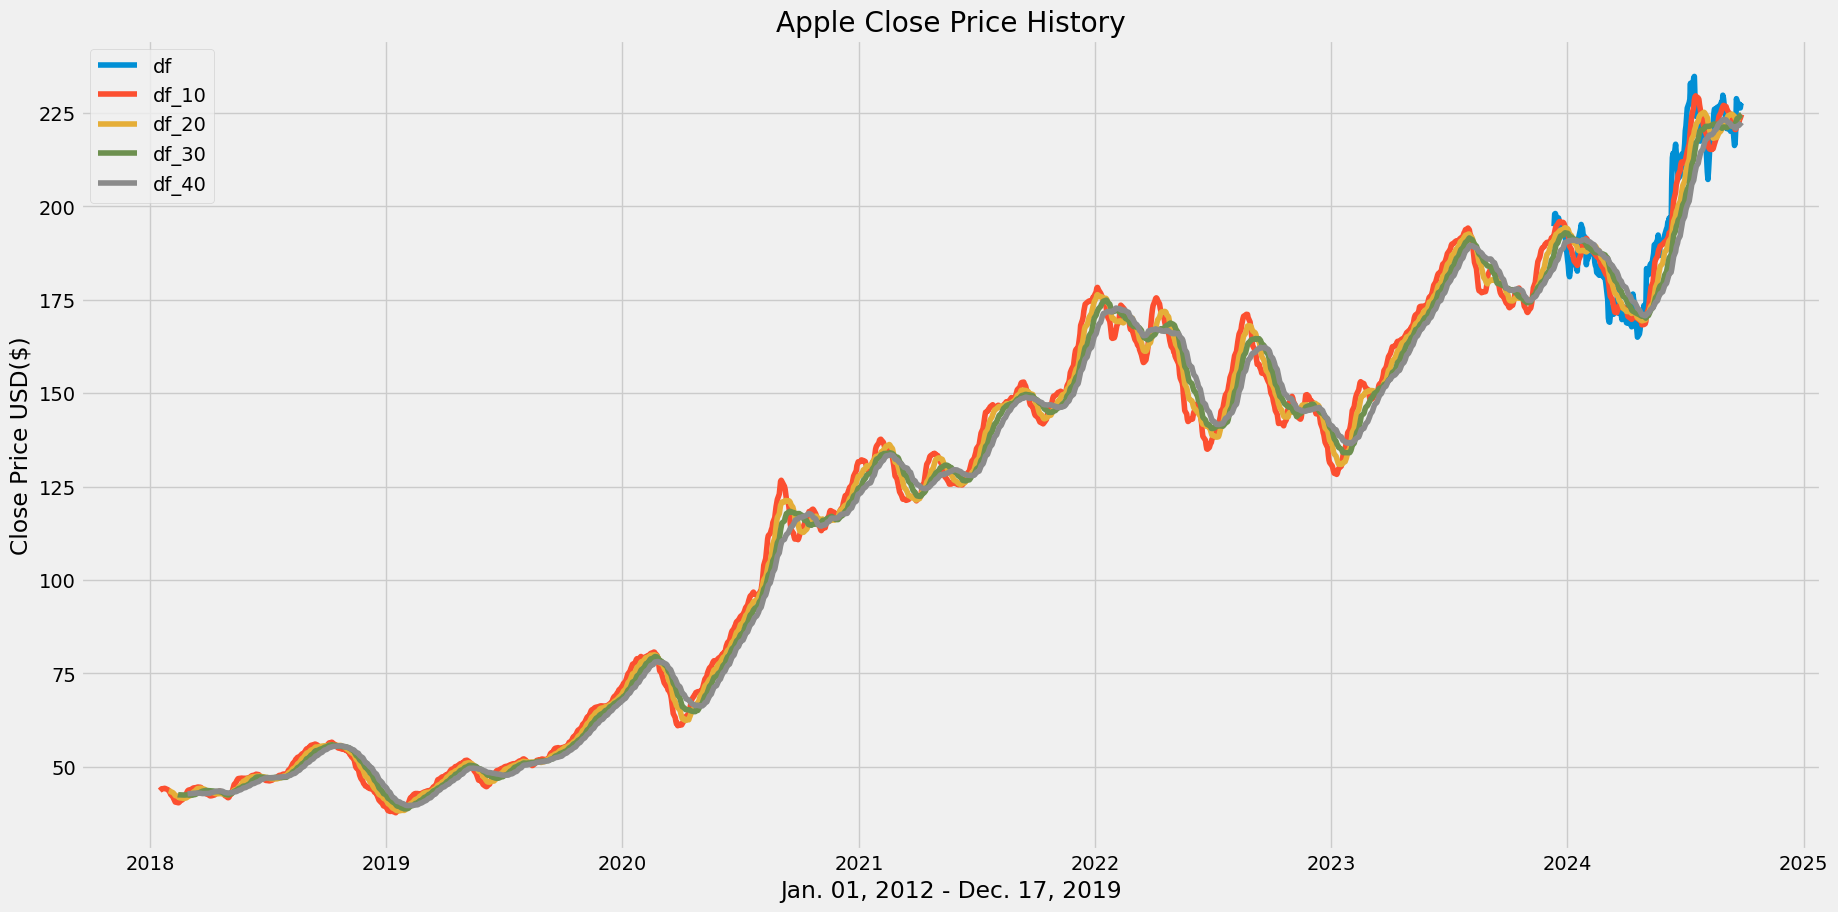

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df['Close'].tail(200), label='df')
plt.plot(df_10['Close'], label='df_10')
plt.plot(df_20['Close'], label='df_20')
plt.plot(df_30['Close'], label='df_30')
plt.plot(df_40['Close'], label='df_40')
plt.title('Apple Close Price History')
plt.xlabel('Jan. 01, 2012 - Dec. 17, 2019')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
data = df.filter(['Close'])
data.head()

,Close
Date,
2018-01-02,43.064999
2018-01-03,43.057499
2018-01-04,43.257500
2018-01-05,43.750000
2018-01-08,43.587502


In [ ]:
#Convert the dataframe to a numpy array
dataset = data.values

In [ ]:
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.7)
training_data_len

1188

In [ ]:
# Scale the data
scaler = MinMaxScaler()#feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data, scaled_data.shape

(array([[0.03772471],
        [0.03768708],
        [0.03869073],
        ...,
        [0.95759569],
        [0.96336673],
        [0.96472161]]),
 (1696, 1))

In [ ]:
train_data = scaled_data[0:training_data_len,:]
## Split the data into train and test
x_train = []
y_train = []

for i in range(30, len(train_data)):
  x_train.append(train_data[i-30:i,0])
  y_train.append(train_data[i,0])
  if i<=31:
    print(x_train)
    print(y_train)
    print()
print(len(x_train))
print(len(y_train))

[array([0.03772471, 0.03768708, 0.03869073, 0.04116222, 0.04034676,
       0.04032167, 0.04027147, 0.0415135 , 0.04378426, 0.04265516,
       0.04630594, 0.04650666, 0.04550302, 0.04367135, 0.04372152,
       0.04018367, 0.03628197, 0.03678379, 0.03233011, 0.03108808,
       0.03166517, 0.03210427, 0.02297105, 0.01794026, 0.0261451 ,
       0.02176666, 0.01625913, 0.01783989, 0.02574365, 0.02778857])]
[0.031589898038389325]

[array([0.03772471, 0.03768708, 0.03869073, 0.04116222, 0.04034676,
       0.04032167, 0.04027147, 0.0415135 , 0.04378426, 0.04265516,
       0.04630594, 0.04650666, 0.04550302, 0.04367135, 0.04372152,
       0.04018367, 0.03628197, 0.03678379, 0.03233011, 0.03108808,
       0.03166517, 0.03210427, 0.02297105, 0.01794026, 0.0261451 ,
       0.02176666, 0.01625913, 0.01783989, 0.02574365, 0.02778857]), array([0.03768708, 0.03869073, 0.04116222, 0.04034676, 0.04032167,
       0.04027147, 0.0415135 , 0.04378426, 0.04265516, 0.04630594,
       0.04650666, 0.04550302, 0

In [ ]:
#Conver the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1158, 30, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Input
from keras.layers import Input, Bidirectional, LSTM, Dense, GlobalAveragePooling1D
from keras.models import Model

# Input layer
inputs = Input(shape=(x_train.shape[1], 1))

# First BiLSTM layer
bilstm_out1 = Bidirectional(LSTM(50, return_sequences=True))(inputs)

# Second BiLSTM laye
bilstm_out2 = Bidirectional(LSTM(50, return_sequences=True))(bilstm_out1)

# Third BiLSTM layer
bilstm_out3 = Bidirectional(LSTM(50, return_sequences=True))(bilstm_out2)

# Pooling layer
pooled_output = GlobalAveragePooling1D()(bilstm_out3)

# Dense layers
dense1 = Dense(25)(pooled_output)
outputs = Dense(1)(dense1)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 30, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 30, 100)             │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 30, 100)             │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 30, 100)             │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 100)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 144,151 (563.09 KB)

 Trainable params: 144,151 (563.09 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 76s 59ms/step - loss: 0.0036
Epoch 2/5
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 69s 60ms/step - loss: 0.0017
Epoch 3/5
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 79s 57ms/step - loss: 0.0019
Epoch 4/5
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 66s 57ms/step - loss: 0.0015
Epoch 5/5
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - loss: 0.0014


In [ ]:
## Create the testing data set
# Create a new array containing scaled vlues from index 1543 to 2003
test_data = scaled_data[training_data_len-30: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(30, len(test_data)):
  x_test.append(test_data[i-30:i, 0])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)
print(len(y_test))

508


In [ ]:
x_train = np.array(x_train)
print(len(x_train))
print(len(y_train))

1158
1158


In [ ]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

train_predictions = model.predict(x_train)
train_predictions = scaler.inverse_transform(train_predictions)
print(train_predictions)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
[[ 41.540806]
 [ 41.487194]
 [ 41.498817]
 ...
 [162.78195 ]
 [162.16498 ]
 [161.702   ]]


In [ ]:
print(predictions[0:5], y_test[0:5])
print()
print(predictions[498:503], y_test[498:503])

[[161.3638 ]
 [160.92624]
 [160.4596 ]
 [159.91486]
 [159.39774]] [[153.72000122]
 [152.74000549]
 [150.42999268]
 [150.77000427]
 [151.75999451]]

[[193.71909]
 [193.56914]
 [193.42212]
 [193.37595]
 [193.55147]] [[216.32000732]
 [216.78999329]
 [220.69000244]
 [228.86999512]
 [228.19999695]]


In [ ]:
# Get the MSE & RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(predictions,y_test)
mape = mean_absolute_percentage_error(predictions,y_test)
mse = mse = mean_squared_error(predictions, y_test)
rmse = math.sqrt(mse)
print (mse)
print (rmse)
print(mae)
print(mape)

199.16389998937277
14.112544065099417
10.328279855683094
0.05839100409381353


In [ ]:
# Reshape y_train to be a 2D array with one column
y_train_reshaped = y_train.reshape(-1, 1)

# Inverse transform y_train
y_train = scaler.inverse_transform(y_train_reshaped)
print(y_train)

[[ 41.84249878]
 [ 43.24750137]
 [ 43.10749817]
 ...
 [150.69999695]
 [154.47999573]
 [156.8999939 ]]


In [ ]:
# Get the MSE & RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
mae_train = mean_absolute_error(train_predictions,y_train)
mape_train = mean_absolute_percentage_error(train_predictions,y_train)
mse_train = mse = mean_squared_error(train_predictions, y_train)
rmse_train = math.sqrt(mse_train)
print (mse_train)
print (rmse_train)
print(mae_train)
print(mape_train)

33.9475739136627
5.826454660740329
4.5585628733527885
0.050855373807579735
